In [1]:
import numpy as np
from utils_clean import generate_sample, DEOptim, RandomOptim, PSOOptim, visualize_meshgrid, get_likelihood_grids, visualize_pred_meshgrid
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

In [4]:
target_func_a = lambda X: (np.e**X + np.sin(2.5 * X**(2) -3)).sum(axis=0)

n_dims = 2
lower_bound = -4, -3
upper_bound = +2, +3

X_a, y_a = generate_sample(70, n_dims, lower_bound, upper_bound, target_func_a)

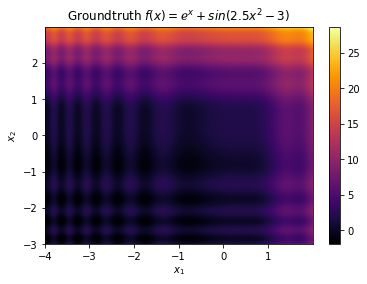

In [8]:
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
m = np.arange(-4,2,0.001)
p = np.arange(-3,3,0.001)
visualize_meshgrid(m, p, target_func_a, title='Groundtruth $f(x)=ℯ^x+sin(2.5 x^2-3)$')
plt.show()

In [38]:
target_func_b = lambda X: (2*X[0]**2 - 1.05*X[0]**4 + 1/6*X[0]**6 + X[0]*X[1] + X[1]**2)

n_dims = 2
lower_bound = -2, -2
upper_bound = +2, +2

X_b, y_b = generate_sample(70, n_dims, lower_bound, upper_bound, target_func_b)

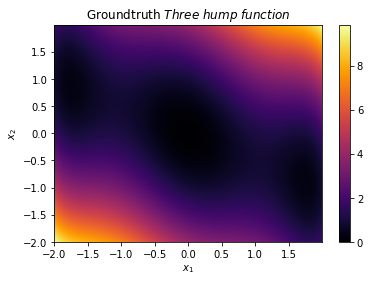

In [43]:
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
m = np.arange(-2,2,0.001)
p = np.arange(-2,2,0.001)
visualize_meshgrid(m, p, target_func_b, title='Groundtruth $Three$ $hump$ $function$')
plt.show()

In [44]:
target_func_c = lambda X: (3*(np.sin(0.5+0.25*X[1]*X[0]))*np.cos(X[0]))

n_dims = 2
lower_bound = -7, -7
upper_bound = +7, +7

X_c, y_c = generate_sample(70, n_dims, lower_bound, upper_bound, target_func_c)

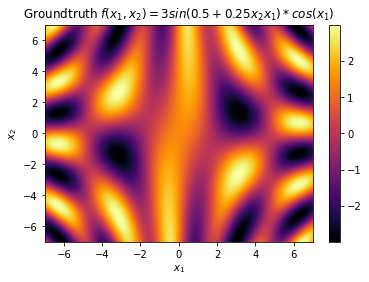

In [45]:
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
m = np.arange(-7,7,0.005)
p = np.arange(-7,7,0.005)
visualize_meshgrid(m, p, target_func_c, title='Groundtruth $f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)$')
plt.show()

In [50]:
import pandas as pd
df_results = pd.DataFrame({"Iteration":[], "Groundtruth":[], "DE_ML":[], "PSO_ML":[], "RS_ML":[]})

In [54]:
f_list = ["f(x)=e^x+sin(2.5 x^2-3)", "Three Hump", "f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)"]

In [51]:
for i in range(20):
    for f,X,y in zip(f_list, [X_a, X_b, X_c], [y_a, y_b, y_c]):
        de = DEOptim(maxiter=100)
        gpr_de = GaussianProcessRegressor(optimizer=de.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_de.fit(X.T, y[...,None])

        rs = RandomOptim(maxiter=1000, random_state=i, visualize=True)
        gpr_rs = GaussianProcessRegressor(optimizer=rs.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_rs.fit(X.T, y[...,None])

        pso = PSOOptim(n_iters=100, n_particles=10, c1=0.5, c2=0.3, w=0.9, visualize=True)
        gpr_pso = GaussianProcessRegressor(optimizer=pso.optimize, kernel=RBF(length_scale=(1,1)))
        gpr_pso.fit(X.T, y[...,None])

        df_results.loc[len(df_results)] = [i, f, gpr_de.log_marginal_likelihood_value_, gpr_pso.log_marginal_likelihood_value_, gpr_rs.log_marginal_likelihood_value_]

2022-08-08 08:36:34,331 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=921   
2022-08-08 08:36:35,477 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 921.0447102161494, best pos: [-0.41860598 -1.18835936]
2022-08-08 08:36:36,787 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=97.3
2022-08-08 08:36:37,938 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 97.2739197939238, best pos: [-0.41017207 -0.47470817]
2022-08-08 08:36:38,994 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=124
2022-08-08 08:36:40,175 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 123.8197258680933

In [53]:
df_results["Iteration"] = df_results["Iteration"].astype(int)
df_results

,Iteration,Groundtruth,DE_ML,PSO_ML,RS_ML
0,0,f(x)=e^x+sin(2.5 x^2-3),-920.990092,-921.044710,-945.334746
1,0,Three Hump,-97.273693,-97.273920,-122.616551
2,0,"f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)",-137.776961,-123.819726,-129.285508
3,1,f(x)=e^x+sin(2.5 x^2-3),-920.990092,-920.990582,-923.878854
4,1,Three Hump,-97.273693,-97.273733,-102.617589
5,1,"f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)",-137.776838,-123.826537,-124.660285
6,2,f(x)=e^x+sin(2.5 x^2-3),-920.990092,-920.990226,-959.430454
7,2,Three Hump,-97.273694,-97.273758,-125.669217
8,2,"f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)",-123.819705,-123.819840,-126.724934
9,3,f(x)=e^x+sin(2.5 x^2-3),-920.990092,-920.997128,-977.120156


In [85]:
df_1 = df_results[["Groundtruth","DE_ML"]]
df_1["Optimizer"] = "DE"
df_1=df_1.rename(columns={"DE_ML": "Log Likelihood"}, inplace=False)
df_2 = df_results[["Groundtruth","PSO_ML"]]
df_2["Optimizer"] = "PSO"
df_2=df_2.rename(columns={"PSO_ML": "Log Likelihood"}, inplace=False)
df_3 = df_results[["Groundtruth","RS_ML"]]
df_3["Optimizer"] = "RS"
df_3=df_3.rename(columns={"RS_ML": "Log Likelihood"}, inplace=False)

C:\Users\ti-he\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ti-he\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ti-he\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [86]:
df_results_ = pd.concat((df_1, df_2, df_3))
df_results_

,Groundtruth,Log Likelihood,Optimizer
0,f(x)=e^x+sin(2.5 x^2-3),-920.990092,DE
1,Three Hump,-97.273693,DE
2,"f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)",-137.776961,DE
3,f(x)=e^x+sin(2.5 x^2-3),-920.990092,DE
4,Three Hump,-97.273693,DE
...,...,...,...
55,Three Hump,-102.488594,RS
56,"f(x_1,x_2)=3sin(0.5+0.25x_2x_1)*cos(x_1)",-126.105072,RS
57,f(x)=e^x+sin(2.5 x^2-3),-1003.028588,RS
58,Three Hump,-97.464114,RS


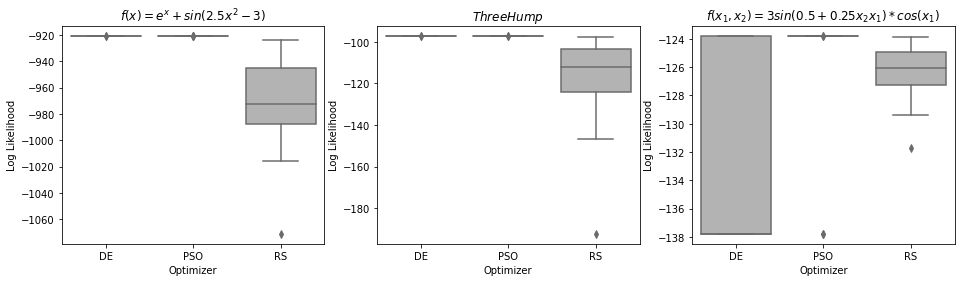

In [95]:
import seaborn as sns
i= 0
plt.figure(figsize=(16,4))
for f in f_list:
    i+=1
    plt.subplot(1,3,i)
    sns.boxplot(x="Optimizer", y="Log Likelihood", data=df_results_.loc[df_results["Groundtruth"]==f], color=(.7,.7,.7))
    plt.title(f'${f}$')

In [ ]:
n = 100
x_grid = np.linspace(-10, 10, n)
y_grid = np.linspace(-10, 10, n)
X_grid = np.array(np.meshgrid(x_grid, y_grid))
X_grid  = X_grid.swapaxes(0, 2)
X_grid = X_grid.reshape((-1, 2))
i= 0
plt.figure(figsize=(16,4))
for f in f_list:
    i+=1
    plt.subplot(1,3,i)
    z = np.asarray([gpr_de.log_marginal_likelihood(X) for X in X_grid])
    z = z.reshape(n, n)
    plt.pcolormesh(x_grid, y_grid, z, cmap="inferno")
    plt.colorbar()
    plt.xlabel(r"$\theta_1$", fontsize=14)
    plt.ylabel(r"$\theta_2$", fontsize=14)
    plt.title("Likelihood", y=1.15, fontsize=18)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.175, 0, 0), ncol=3)
    plt.title(f'${f}$')